## Generate results for Norm dataset with kc-Opt clustering and performance evaluation plots

In [1]:

import sys
import os
sys.path.append('../')
from Codes.model import *
from Codes.utils import *
plt.style.use('default')

from tqdm import tqdm
import pickle
RESULT_DIR = "../../ExptsPaper"

from timeit import default_timer
from sklearn.datasets import make_blobs




In [2]:

def Blobs(N,D,K,box,seed):

    generator = np.random.RandomState(seed)
    center_box = [0,box]

    centers = generator.uniform(center_box[0], center_box[1], size=(K, D))

    X, y = make_blobs(n_samples=N, centers=centers, n_features=D, cluster_std = 1,
                    random_state=seed)

    cols = [ 'X' + str(i+1) for i in range(D) ]
    df_data = pd.DataFrame(X, columns = cols)

        
    return df_data, X,y




## k = 5, d = 5, 10, 15

In [3]:
N_list = [1000, 3150, 10000, 31500, 100000, 315000, 1000000]

K = 5
D_list = [5,10,15] 

box = 500
seed = 60

tol_list = [0.08,0.15,0.15]
initCons_list = 5
cnt = 0

for i, D in enumerate(tqdm(D_list)):
    optgap_list=[]

    time_list = []
    metrics_list = []

    # obj_list = []
    constrsCnt_list = []

    epsVal_list = []
    optVal_list = []

    centers_list = []
    
    for N in tqdm(N_list):
        print('\n\n\nStarting N = %i K = %i and D = %i' %(N,K,D))

        df_data, X,y = Blobs(N,D,K,box, seed)

        clus = UnsupervisedClustering(K =K , max_iter= 100, random_state=0)
        clus.set_model(MinMax(initConstrCnt=initCons_list, optimalGap= 0.05, tol = tol_list[i], time = 60))

        start = default_timer()
        clus.fit(df_data )

        end = default_timer()
        metrics_list.append(clus.evaluate(y))
        # print(metrics_list[-1])
        time_list.append(end-start)

        constrsCnt_list.append(len(clus.constr_gen_pts))
        optgap_list.append(clus.model_optGap)

        epsVal_list.append(clus.epsVal)
        optVal_list.append(clus.model_optVal)

        centers_list.append(clus.cluster_centers)

        # obj_list.append(clus)

        cnt+=1

        print('Finished running N = %i K = %i and D = %i' %(N,K,D))
        print('*'*100)




    with open(os.path.join(RESULT_DIR, 'Syn1_'+str(K)+str(D)+'_MM.pkl'), 'wb') as outp:

        pickle.dump(metrics_list, outp, pickle.HIGHEST_PROTOCOL)
        pickle.dump(time_list, outp, pickle.HIGHEST_PROTOCOL)
        pickle.dump(constrsCnt_list, outp, pickle.HIGHEST_PROTOCOL)
        pickle.dump(optgap_list, outp, pickle.HIGHEST_PROTOCOL)
        pickle.dump(epsVal_list, outp, pickle.HIGHEST_PROTOCOL)
        pickle.dump(optVal_list, outp, pickle.HIGHEST_PROTOCOL)
        pickle.dump(centers_list, outp, pickle.HIGHEST_PROTOCOL)





  0%|          | 0/3 [00:00<?, ?it/s]




Starting N = 1000 K = 5 and D = 5
MinMax model 0
# of outliers:  0
Set parameter Username
Academic license - for non-commercial use only - expires 2022-11-07
Set parameter TimeLimit to value 3600
Set parameter MIPGap to value 0.05
E:  6.7262963193274175
E:  7.322847823906045
E:  7.322847823905988
E:  7.390430637930763
E:  7.390430637930876


E:  7.39043063793082
Optimal solution reached with Cost:  7.39043063793082


# of constraints added:  50
Finished running N = 1000 K = 5 and D = 5
****************************************************************************************************



Starting N = 3150 K = 5 and D = 5
MinMax model 0
# of outliers:  0
Set parameter TimeLimit to value 3600
Set parameter MIPGap to value 0.05
E:  8.53893883224191
E:  8.53893883224191
E:  8.538938832242025
E:  8.538938832241854
E:  8.53893883224191
E:  8.53893883224191
E:  8.53893883224191


E:  8.53893883224191
Optimal solution reached with Cost:  8.53893883224191


# of constraints added:  53
Finished running N = 3150 K = 5 and D = 5
****************************************************************************************************



Starting N = 10000 K = 5 and D = 5
MinMax model 0
# of outliers:  0
Set parameter TimeLimit to value 3600
Set parameter MIPGap to value 0.05
E:  9.30296403822075
E:  9.30296403822075
E:  9.302964038220722
E:  9.30296403822075
E:  9.30296403822075
E:  9.302964038220694
E:  9.302964038220807
Optimal solution reached with Cost:  9.302964038220807




# of constraints added:  51
Finished running N = 10000 K = 5 and D = 5
****************************************************************************************************



Starting N = 31500 K = 5 and D = 5
MinMax model 0
# of outliers:  0
Set parameter TimeLimit to value 3600
Set parameter MIPGap to value 0.05
E:  10.614131016288525
E:  10.614131016288468
E:  10.614131016288454
E:  10.614131016288468
E:  10.614131016288468
E:  10.614131016288468
E:  10.614131016288468
E:  10.614131016288468
E:  10.614131016288468
E:  10.61413101628844
E:  10.614131016288411
E:  10.614131016288468
Optimal solution reached with Cost:  10.614131016288468




# of constraints added:  63
Finished running N = 31500 K = 5 and D = 5
****************************************************************************************************



Starting N = 100000 K = 5 and D = 5
MinMax model 0
# of outliers:  0
Set parameter TimeLimit to value 3600
Set parameter MIPGap to value 0.05
E:  10.614131016288468
E:  10.614131016288454
E:  10.614131016288468
E:  10.61413101628844
E:  10.614131016288468
E:  10.614131016288454
E:  10.61413101628846
E:  10.614131016288411
E:  10.614131016288454
E:  10.614131016288468
Optimal solution reached with Cost:  10.614131016288468




# of constraints added:  60
Finished running N = 100000 K = 5 and D = 5
****************************************************************************************************



Starting N = 315000 K = 5 and D = 5
MinMax model 0
# of outliers:  0
Set parameter TimeLimit to value 3600
Set parameter MIPGap to value 0.05
E:  10.652899470010482
E:  10.652899470010539
E:  10.903093209928102
E:  10.903093209928159
E:  10.903093209928159
E:  10.903093209928045
E:  10.903093209928187
E:  10.903093209928159
Optimal solution reached with Cost:  10.903093209928159


# of constraints added:  55


Finished running N = 315000 K = 5 and D = 5
****************************************************************************************************



Starting N = 1000000 K = 5 and D = 5
MinMax model 0
# of outliers:  0
Set parameter TimeLimit to value 3600
Set parameter MIPGap to value 0.05
E:  11.295072423729678
E:  11.374692425165449
E:  11.374692425165449
E:  11.374692425165449
E:  11.374692425165449
E:  11.374692425165449
E:  11.374692425165449
E:  11.374692425165506
E:  11.374692425165449
E:  11.374692425165506
E:  11.374692425165392
E:  11.374692425165506
E:  11.374692425165449
E:  11.374692425165449
E:  11.374692425165449
Optimal solution reached with Cost:  11.374692425165449


# of constraints added:  67


 33%|███▎      | 1/3 [01:36<03:12, 96.41s/it]

Finished running N = 1000000 K = 5 and D = 5
****************************************************************************************************



Starting N = 1000 K = 5 and D = 10
MinMax model 0
# of outliers:  0
Set parameter TimeLimit to value 3600
Set parameter MIPGap to value 0.05
E:  12.753718600400816
E:  12.753718600400873
E:  12.753718600400873
E:  12.75371860040083
E:  12.753718600400845
E:  12.75371860040083
E:  12.753718600400873
E:  12.753718600400902
E:  12.753718600400845
E:  12.753718600400816
E:  12.753718600400816
E:  12.75371860040083
E:  12.753718600400816
E:  12.753718600400845


E:  12.753718600400816
Optimal solution reached with Cost:  12.753718600400816


# of constraints added:  84
Finished running N = 1000 K = 5 and D = 10
****************************************************************************************************



Starting N = 3150 K = 5 and D = 10
MinMax model 0
# of outliers:  0
Set parameter TimeLimit to value 3600
Set parameter MIPGap to value 0.05
E:  12.62725349731545
E:  12.989737467659097
E:  13.379275986151166
E:  13.379275986151242
E:  13.497597740576907
E:  13.596759432163083
E:  13.723468302389634
E:  13.723468302389733
E:  13.772393323618758
E:  13.794095171290223
E:  13.794095171290394
E:  13.794095171290166
E:  13.794095171290166
E:  13.794095171290394
E:  13.794095171290166


E:  13.794095171290166
Optimal solution reached with Cost:  13.794095171290166


# of constraints added:  81
Finished running N = 3150 K = 5 and D = 10
****************************************************************************************************



Starting N = 10000 K = 5 and D = 10
MinMax model 0
# of outliers:  0
Set parameter TimeLimit to value 3600
Set parameter MIPGap to value 0.05
E:  13.550149890467878
E:  14.49989887943319
E:  14.499898879433161
E:  14.49989887943326
E:  14.499898879433175
E:  14.49989887943326
E:  14.558313065754362
E:  14.558313065754362
E:  14.570817646440673
E:  14.570817646440759
E:  14.570817646440673
E:  14.570817646440702
E:  14.570817646440616
E:  14.570817646440531
E:  14.570817646440616
E:  14.570817646440702
E:  14.570817646440759
E:  14.570817646440673
Optimal solution reached with Cost:  14.570817646440673




# of constraints added:  96
Finished running N = 10000 K = 5 and D = 10
****************************************************************************************************



Starting N = 31500 K = 5 and D = 10
MinMax model 0
# of outliers:  0
Set parameter TimeLimit to value 3600
Set parameter MIPGap to value 0.05
E:  14.584597298713163
E:  14.714004011698194
E:  15.023291865732588
E:  15.171684337692213
E:  15.446295751670306
E:  15.446295751670334
E:  15.454889831775745
E:  15.46104110073486
E:  15.46104110073486
E:  15.461041100734292
E:  15.46104110073486
E:  15.461041100734292
E:  15.461041100734292
E:  15.46104110073486
E:  15.461041100734292
E:  15.461041100734292
E:  15.461041100734576
E:  15.461041100734576
E:  15.46104110073452
Optimal solution reached with Cost:  15.46104110073452




# of constraints added:  94
Finished running N = 31500 K = 5 and D = 10
****************************************************************************************************



Starting N = 100000 K = 5 and D = 10
MinMax model 0
# of outliers:  0
Set parameter TimeLimit to value 3600
Set parameter MIPGap to value 0.05
E:  15.244146140218277
E:  15.398992007715208
E:  15.398992007715378
E:  15.977215422721372
E:  16.17864364547529
E:  16.178643645475233
E:  16.178643645475063
E:  16.178643645475177
E:  16.178643645475177
E:  16.178643645475177
E:  16.178643645475404
E:  16.178643645475518
E:  16.178643645475347
E:  16.178643645475233
E:  16.178643645475518
E:  16.17864364547512
E:  16.178643645475148
E:  16.17864364547529
E:  16.178643645475177
E:  16.178643645475233
E:  16.178643645475063
E:  16.178643645475262
Optimal solution reached with Cost:  16.178643645475262




# of constraints added:  112
Finished running N = 100000 K = 5 and D = 10
****************************************************************************************************



Starting N = 315000 K = 5 and D = 10
MinMax model 0
# of outliers:  0
Set parameter TimeLimit to value 3600
Set parameter MIPGap to value 0.05
E:  15.4298661006316
E:  15.741104396231265
E:  16.07219991588707
E:  16.462975170229527
E:  16.766828231422437
E:  16.766828231422096
E:  16.766828231422096
E:  16.766828231422096
E:  16.76682823142204
E:  16.766828231422096
E:  16.766828231421812
E:  16.766828231422096
E:  16.766828231422124
E:  16.766828231422323
E:  16.76682823142204
E:  16.766828231422096
E:  16.76682823142221
E:  16.766828231422096
E:  16.76682823142221
E:  16.766828231422096
E:  16.76682823142221
E:  16.766828231422096
E:  16.76682823142221
E:  16.76682823142231
E:  16.766828231421925
Optimal solution reached with Cost:  16.766828231421925


# of constraints added:  112


Finished running N = 315000 K = 5 and D = 10
****************************************************************************************************



Starting N = 1000000 K = 5 and D = 10
MinMax model 0
# of outliers:  0
Set parameter TimeLimit to value 3600
Set parameter MIPGap to value 0.05
E:  19.096658878962934
Optimal solution reached with Cost:  19.096658878962934


# of constraints added:  35


 67%|██████▋   | 2/3 [03:40<01:52, 112.82s/it]

Finished running N = 1000000 K = 5 and D = 10
****************************************************************************************************



Starting N = 1000 K = 5 and D = 15
MinMax model 0
# of outliers:  0
Set parameter TimeLimit to value 3600
Set parameter MIPGap to value 0.05
E:  15.58397267053806
E:  16.729770844499058
E:  16.81440585986047
E:  16.89169430961897
E:  16.964175510700784
E:  16.98537272563493
E:  16.987217692185027
E:  16.987217692185027
E:  16.987217692185027
E:  16.98721769218514
E:  16.987217692185084
E:  16.987217692185084


E:  16.987217692184686
Optimal solution reached with Cost:  16.987217692184686


# of constraints added:  84
Finished running N = 1000 K = 5 and D = 15
****************************************************************************************************



Starting N = 3150 K = 5 and D = 15
MinMax model 0
# of outliers:  0
Set parameter TimeLimit to value 3600
Set parameter MIPGap to value 0.05
E:  17.54702988698446
E:  17.547029886984518
E:  17.674170970949547
E:  18.11021762880307
E:  18.110217628803127
E:  18.172031739955656
E:  18.223978539284133
E:  18.22679969713994
E:  18.226799697139768
E:  18.226799697139825
E:  18.226799697139597
E:  18.226799697139796
E:  18.22679969713994
E:  18.226799697139654


E:  18.22679969713979
Optimal solution reached with Cost:  18.22679969713979


# of constraints added:  96
Finished running N = 3150 K = 5 and D = 15
****************************************************************************************************



Starting N = 10000 K = 5 and D = 15
MinMax model 0
# of outliers:  0
Set parameter TimeLimit to value 3600
Set parameter MIPGap to value 0.05
E:  18.855414966401554
E:  18.85541496640144
E:  18.861729514329937
E:  19.085246927385043
E:  19.166586864427927
E:  19.222156069738105
E:  19.394541902704077
E:  19.394541902703907
E:  19.394541902704077
E:  19.394541902703963
E:  19.394541902703963
E:  19.394541902704304
E:  19.394541902704077
E:  19.39454190270385
E:  19.394541902704134
E:  19.394541902703963
E:  19.394541902704134
E:  19.394541902704077
E:  19.39454190270402
E:  19.394541902704077
E:  19.39454190270419
E:  19.39454190270402
E:  19.394541902703963
E:  19.394541902703963
Optimal solution reached with Cost:  19.394541902703963




# of constraints added:  132
Finished running N = 10000 K = 5 and D = 15
****************************************************************************************************



Starting N = 31500 K = 5 and D = 15
MinMax model 0
# of outliers:  0
Set parameter TimeLimit to value 3600
Set parameter MIPGap to value 0.05
E:  19.46251756309084
E:  20.0574026408093
E:  20.972576383810775
E:  20.972576383810804
E:  20.97257638381069
E:  20.972576383810804
E:  20.972576383810804
E:  20.972576383810804
E:  20.972576383810775
E:  20.972576383810804
E:  20.972576383810804
E:  20.972576383810804
E:  20.972576383810804
E:  20.972576383810775
E:  20.97257638381086
E:  20.97257638381086
E:  20.972576383810804
E:  20.972576383810804
E:  20.972576383810775
E:  20.972576383810747
E:  20.972576383810974
E:  20.972576383810747
E:  20.97257638381086
E:  20.972576383810747
E:  20.972576383810775
E:  20.97257638381086
E:  20.97257638381086
E:  20.972576383810917
E:  20.972576383810633
E:  20.97257638381074



# of constraints added:  140
Finished running N = 31500 K = 5 and D = 15
****************************************************************************************************



Starting N = 100000 K = 5 and D = 15
MinMax model 0
# of outliers:  0
Set parameter TimeLimit to value 3600
Set parameter MIPGap to value 0.05
E:  19.96598551794985
E:  20.667180824721953
E:  21.139607354668016
E:  21.13960735466796
E:  21.21169804410556
E:  21.23643051627198
E:  21.258193458852674
E:  21.395703430188632
E:  21.445115237504524
E:  21.445115237504183
E:  21.446389268685493
E:  21.44740056322769
E:  21.447400563227802
E:  21.447400563227575
E:  21.447400563227575
E:  21.44740056322769
E:  21.447400563227802
E:  21.447400563228086
E:  21.44740056322763
E:  21.44740056322763
E:  21.447400563227802
E:  21.447400563228086
E:  21.447400563227717
E:  21.447400563227916
E:  21.447400563228086
E:  21.447400563227575
E:  21.447400563227518
E:  21.44740056322769
E:  21.447400563227518
E:  21.4474005632278



# of constraints added:  161
Finished running N = 100000 K = 5 and D = 15
****************************************************************************************************



Starting N = 315000 K = 5 and D = 15
MinMax model 0
# of outliers:  0
Set parameter TimeLimit to value 3600
Set parameter MIPGap to value 0.05
E:  20.043345485369116
E:  20.628736957482772
E:  21.111298462693014
E:  21.946973911999777
E:  21.946973911999834
E:  21.946973911999805
E:  21.946973911999777
E:  21.94697391199992
E:  21.94697391199975
E:  21.946973911999805
E:  21.94697391199975
E:  21.946973911999805
E:  21.946973911999805
E:  21.946973911999862
E:  21.94697391199972
E:  21.946973911999862
E:  21.946973911999834
E:  21.94697391199969
E:  21.946973911999606
E:  21.946973911999862
E:  21.946973912000146
E:  21.946973911999805
E:  21.946973911999805
E:  21.94697391199975
E:  21.946973911999862
E:  21.946973911999777
E:  21.94697391199975
E:  21.94697391199975
E:  21.94697391199969
E:  21.946973911999

Finished running N = 315000 K = 5 and D = 15
****************************************************************************************************



Starting N = 1000000 K = 5 and D = 15
MinMax model 0
# of outliers:  0
Set parameter TimeLimit to value 3600
Set parameter MIPGap to value 0.05
E:  21.992373878899684
E:  22.31277603105093
E:  22.380080152562414
E:  22.472077723602695
E:  22.53676064228239
E:  22.536760642282132
E:  22.647693346779874
E:  22.685480350192393
E:  22.87246554606608
E:  22.87246554606611
E:  22.872465546065996
E:  22.87246554606608
E:  22.872524603214742
E:  22.900941060856496
E:  22.905330656690694
E:  22.915920589495613
E:  22.91657202478234
E:  22.917165143119917
E:  22.917165143119746
E:  22.917165143119746
E:  22.9171651431202
E:  22.9171651431202
Optimal solution reached with Cost:  22.9171651431202


# of constraints added:  129


100%|██████████| 3/3 [07:51<00:00, 157.13s/it]

Finished running N = 1000000 K = 5 and D = 15
****************************************************************************************************


In [10]:
epsVal_list, optVal_list, time_list, metrics_list, optgap_list, constrsCnt_list

([16.987217692185304,
  18.239913609874606,
  19.394541902704333,
  20.972576383811457,
  21.46643407670566,
  21.94697391200073,
  23.063518590689547],
 [16.987217692184686,
  18.22679969713979,
  19.394541902703963,
  20.97257638381086,
  21.44740056322786,
  21.946973911999834,
  22.9171651431202],
 [5.775795041000009,
  7.1315155000000345,
  19.279560500000002,
  34.22702700000002,
  51.46205183400002,
  53.36055158300002,
  76.68579449999999],
 [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]],
 [0.008946325200330544,
  0.025215431305776782,
  0.030555949306177825,
  0.034151422749966014,
  0.009141330452121468,
  0.04490067504508504,
  0.044271286770751477],
 [84, 96, 132, 140, 161, 160, 129])

## k = 10, d = 10, 15

In [4]:
N_list = [1000, 3150, 10000, 31500, 100000, 315000, 1000000]

K = 10
D_list = [10,15] 

box = 500
seed = 60

tol_list = [0.3,0.5]
initCons_list = 7
cnt = 0

for i, D in enumerate(tqdm(D_list)):
    optgap_list=[]

    time_list = []
    metrics_list = []

    epsVal_list = []
    optVal_list = []

    centers_list = []
    # obj_list = []
    constrsCnt_list = []
    
    for N in tqdm(N_list):
        print('\n\n\nStarting N = %i K = %i and D = %i' %(N,K,D))

        df_data, X,y = Blobs(N,D,K,box, seed)

        clus = UnsupervisedClustering(K =K , max_iter= 100, random_state=0)
        clus.set_model(MinMax(initConstrCnt=initCons_list, optimalGap= 0.05, tol = tol_list[i], time = 60))

        start = default_timer()
        clus.fit(df_data )

        end = default_timer()
        metrics_list.append(clus.evaluate(y))
        # print(metrics_list[-1])
        time_list.append(end-start)

        constrsCnt_list.append(len(clus.constr_gen_pts))
        optgap_list.append(clus.model_optGap)

        epsVal_list.append(clus.epsVal)
        optVal_list.append(clus.model_optVal)

        centers_list.append(clus.cluster_centers)

        # obj_list.append(clus)

        cnt+=1

        print('Finished running N = %i K = %i and D = %i' %(N,K,D))
        print('*'*100)




    with open(os.path.join(RESULT_DIR, 'Syn1_'+str(K)+str(D)+'_MM.pkl'), 'wb') as outp:

        pickle.dump(metrics_list, outp, pickle.HIGHEST_PROTOCOL)
        pickle.dump(time_list, outp, pickle.HIGHEST_PROTOCOL)
        pickle.dump(constrsCnt_list, outp, pickle.HIGHEST_PROTOCOL)
        pickle.dump(optgap_list, outp, pickle.HIGHEST_PROTOCOL)
        pickle.dump(epsVal_list, outp, pickle.HIGHEST_PROTOCOL)
        pickle.dump(optVal_list, outp, pickle.HIGHEST_PROTOCOL)
        pickle.dump(centers_list, outp, pickle.HIGHEST_PROTOCOL)




  0%|          | 0/2 [00:00<?, ?it/s]




Starting N = 1000 K = 10 and D = 10
MinMax model 0
# of outliers:  0
Set parameter TimeLimit to value 3600
Set parameter MIPGap to value 0.05
E:  11.990372874052667
E:  11.990372874052639
E:  11.990372874052696
E:  11.990372874052582
E:  11.99037287405281
E:  11.990372874052696
E:  11.990372874052582


E:  11.990372874052753
Optimal solution reached with Cost:  11.990372874052753


# of constraints added:  146
Finished running N = 1000 K = 10 and D = 10
****************************************************************************************************



Starting N = 3150 K = 10 and D = 10
MinMax model 0
# of outliers:  0
Set parameter TimeLimit to value 3600
Set parameter MIPGap to value 0.05
E:  13.362424414268844
E:  13.362424414268787
E:  13.3624244142689
E:  13.3624244142689
E:  13.36242441426873
E:  13.36242441426873
E:  13.36242441426873
E:  13.36242441426856
E:  13.36242441426856
E:  13.362424414268787
E:  13.362424414268617
E:  13.36242441426873
E:  13.36242441426873
E:  13.3624244142689
E:  13.362424414268787
E:  13.3624244142689
E:  13.362424414268958
E:  13.3624244142689
E:  13.362424414268844
Optimal solution reached with Cost:  13.362424414268844




# of constraints added:  185
Finished running N = 3150 K = 10 and D = 10
****************************************************************************************************



Starting N = 10000 K = 10 and D = 10
MinMax model 0
# of outliers:  0
Set parameter TimeLimit to value 3600
Set parameter MIPGap to value 0.05
E:  14.215733490206802
E:  14.21573349020673
E:  14.367946729722803
E:  14.367946729722803
E:  14.410994439973706
E:  14.455433021553404
E:  14.45543302155346
E:  14.455433021553574
E:  14.455433021553404
E:  14.455433021553517
E:  14.455433021553432
E:  14.455433021553404
Optimal solution reached with Cost:  14.455433021553404




# of constraints added:  176
Finished running N = 10000 K = 10 and D = 10
****************************************************************************************************



Starting N = 31500 K = 10 and D = 10
MinMax model 0
# of outliers:  0
Set parameter TimeLimit to value 3600
Set parameter MIPGap to value 0.05
E:  14.474155090310475
E:  14.728926877836642
E:  14.988726030717828
E:  15.082415983205351
E:  15.082415983205635
E:  15.103889503931782
E:  15.108883125144473
E:  15.1088831251447
E:  15.108883125144303
E:  15.108883125144473
E:  15.108883125144473
E:  15.10888312514453
E:  15.108883125144473
E:  15.108883125144473
E:  15.10888312514436
E:  15.108883125144303
E:  15.108883125144473
Optimal solution reached with Cost:  15.108883125144473




# of constraints added:  211
Finished running N = 31500 K = 10 and D = 10
****************************************************************************************************



Starting N = 100000 K = 10 and D = 10
MinMax model 0
# of outliers:  0
Set parameter TimeLimit to value 3600
Set parameter MIPGap to value 0.05
E:  15.083151114561474
E:  15.200073250908076
E:  15.386748479171672
E:  15.49890977493817
E:  15.50896146681589
E:  15.530552125491624
E:  15.534018036384737
E:  15.544391851704688
E:  15.544391851704745
E:  15.544391851704745
E:  15.544391851704745
E:  15.544391851704745
E:  15.544391851704745
E:  15.544391851705143
E:  15.544391851705143
E:  15.544391851704745
E:  15.544391851704631
E:  15.544391851704972
E:  15.544391851704688
E:  15.544391851704859
E:  15.544391851704859
Optimal solution reached with Cost:  15.544391851704859




# of constraints added:  213
Finished running N = 100000 K = 10 and D = 10
****************************************************************************************************



Starting N = 315000 K = 10 and D = 10
MinMax model 0
# of outliers:  0
Set parameter TimeLimit to value 3600
Set parameter MIPGap to value 0.05
E:  15.713710031219392
E:  15.737378340505956
E:  15.987060433185036
E:  16.200070301155506
E:  16.3088987161872
E:  16.419047577680885
E:  16.458025956356607
E:  16.458262046001323
E:  16.458262046001266
E:  16.458262046001266
E:  16.45826204423044
E:  16.458262046001266
E:  16.458262043657257
E:  16.45826204600138
E:  16.458262046001437
E:  16.458262046001323
E:  16.458262043819733
E:  16.458262046001437
E:  16.458262046001323
E:  16.458262046001323
E:  16.458262046001096
E:  16.458262046001437
E:  16.458262046001096
E:  16.458262046001437
E:  16.458262042444648
E:  16.45826204600121
E:  16.458262046001437
E:  16.458262046001437
E:  16.458262046001096
E:  16.458262

Finished running N = 315000 K = 10 and D = 10
****************************************************************************************************



Starting N = 1000000 K = 10 and D = 10
MinMax model 0
# of outliers:  0
Set parameter TimeLimit to value 3600
Set parameter MIPGap to value 0.05
E:  16.808888609204814
E:  17.040294868450417
E:  17.07257662428441
E:  17.131353118496804
E:  17.17021244985193
E:  17.170212449852443
E:  17.170212449851988
E:  17.302788672898714
E:  17.3027886728986
E:  17.302788672898714
E:  17.302788670696916
E:  17.302788671067017
E:  17.302788672899055
E:  17.302788670517714
E:  17.302788672898714
E:  17.302788672898487
E:  17.30278867289894
E:  17.3027886728986
E:  17.302788672898657
Optimal solution reached with Cost:  17.302788672898657


# of constraints added:  222


 50%|█████     | 1/2 [31:23<31:23, 1883.29s/it]

Finished running N = 1000000 K = 10 and D = 10
****************************************************************************************************



Starting N = 1000 K = 10 and D = 15
MinMax model 0
# of outliers:  0
Set parameter TimeLimit to value 3600
Set parameter MIPGap to value 0.05
E:  16.83524451846131
E:  16.835244518461707
E:  16.835244518461764
E:  16.835244518461735
E:  16.835244518461764
E:  16.83524451846182
E:  16.835244518461593
E:  16.835244518461877
E:  16.83524451846199
E:  16.835244518461593
E:  16.835244518461593
E:  16.83524451846165
E:  16.835244518461593
E:  16.83524451846185


E:  16.835244518461707
Optimal solution reached with Cost:  16.835244518461707


# of constraints added:  208
Finished running N = 1000 K = 10 and D = 15
****************************************************************************************************



Starting N = 3150 K = 10 and D = 15
MinMax model 0
# of outliers:  0
Set parameter TimeLimit to value 3600
Set parameter MIPGap to value 0.05
E:  17.03718760705516
E:  17.358768356182125
E:  17.529522439747666
E:  17.705196588216666
E:  17.70519658821661
E:  17.73664757629399
E:  17.76466260156809
E:  17.791916342644356
E:  17.793277828085223
E:  17.793277828085223
E:  17.793277828085223
E:  17.79327782808548
E:  17.793277828085223
E:  17.793277828085223
E:  17.793277828085223
E:  17.793277828085223
E:  17.793277828085163
E:  17.79327782808515
E:  17.79327782808548
E:  17.79327782808531
Optimal solution reached with Cost:  17.79327782808531


# of constraints added:  240


Finished running N = 3150 K = 10 and D = 15
****************************************************************************************************



Starting N = 10000 K = 10 and D = 15
MinMax model 0
# of outliers:  0
Set parameter TimeLimit to value 3600
Set parameter MIPGap to value 0.05
E:  18.801923263508456
E:  18.80192326350857
E:  18.80192326350857
E:  18.824509545388537
E:  18.84510638464036
E:  18.986405977690936
E:  19.041760407169022
E:  19.073025515783126
E:  19.110708173554826
E:  19.12204356629252
E:  19.122043566292405
E:  19.122043566292575
E:  19.122043566292405
E:  19.122043566292575
E:  19.122043566292405
E:  19.122043566292575
E:  19.122043566292575
E:  19.122043566292543
E:  19.122043566292575
E:  19.12204356629246
E:  19.122043566292575
E:  19.12204356629246
E:  19.12204356629246
E:  19.122043566292405
E:  19.12204356629246
E:  19.122043566292575
E:  19.122043566292575
E:  19.122043566292398
E:  19.122043566292575
E:  19.122043566292543
E:  19.122043566292575
E:  



# of constraints added:  353
Finished running N = 10000 K = 10 and D = 15
****************************************************************************************************



Starting N = 31500 K = 10 and D = 15
MinMax model 0
# of outliers:  0
Set parameter TimeLimit to value 3600
Set parameter MIPGap to value 0.05
E:  20.97257638381086
E:  20.972576383810804
E:  20.972576383810804
E:  20.97257638381086
E:  20.97257638381086
E:  20.972576383810804
E:  20.972576383810804
E:  20.97257638381086
E:  20.972576383810804
E:  20.972576381142993
E:  20.972576383810974
E:  20.972576383810633
E:  20.972576383810974
E:  20.972576383810917
E:  20.97257638381086
E:  20.972576383810917
E:  20.972576383810946
E:  20.97257638381079
E:  20.972576383811145
E:  20.972576383810974
E:  20.97257638381086
E:  20.972576383810804
E:  20.97257638381086
E:  20.972576383810974
E:  20.972576383810747
E:  20.97257638381072
E:  20.97257638381066
E:  20.972576383810832
E:  20.972576383810804
E:  20.9725763838108



# of constraints added:  390
Finished running N = 31500 K = 10 and D = 15
****************************************************************************************************



Starting N = 100000 K = 10 and D = 15
MinMax model 0
# of outliers:  0
Set parameter TimeLimit to value 3600
Set parameter MIPGap to value 0.05
E:  20.340375627263786
E:  20.757540489416783
E:  21.24065897363522
E:  21.24065897363522
E:  21.24065897363539
E:  21.240658973635107
E:  21.25524703311737
E:  21.255247033117257
E:  21.25841880174994
E:  21.26772938676072
E:  21.270653888693403
E:  21.2706538886938
E:  21.270653888693573
E:  21.270653888693516
E:  21.270653888693687
E:  21.27065388869346
E:  21.27065388869346
E:  21.2706538886938
E:  21.270653888693687
E:  21.270653888693573
E:  21.270653882107865
E:  21.27065388869346
E:  21.27065388869346
E:  21.270653888693573
E:  21.270653885433667
E:  21.27065388869397
E:  21.270653888693687
E:  21.27065388869346
E:  21.270653888693914
E:  21.270653888693683
E:



# of constraints added:  539
Finished running N = 100000 K = 10 and D = 15
****************************************************************************************************



Starting N = 315000 K = 10 and D = 15
MinMax model 0
# of outliers:  0
Set parameter TimeLimit to value 3600
Set parameter MIPGap to value 0.05
E:  20.803371115391656
E:  21.610358047725782
E:  21.610358047725867
E:  21.610358045183602
E:  21.61035804772598
E:  21.61035804772584
E:  21.61035804772581
E:  21.632907007393044
E:  21.638859581018806
E:  21.677597767885814
E:  21.677597767885864
E:  21.677597765240346
E:  21.6775977678858
E:  21.6775977678858
E:  21.677597767885775
E:  21.67759776788579
E:  21.677597767885725
E:  21.67759776788584
E:  21.677597767885825
E:  21.677597767885743
E:  21.677597767885814
E:  21.677597767885814
E:  21.677597767885725
E:  21.67759776437317
E:  21.677597761228242
E:  21.677597767885825
E:  21.67759776788585
E:  21.677597765195742
E:  21.677597767885725
E:  21.677597761212

Finished running N = 315000 K = 10 and D = 15
****************************************************************************************************



Starting N = 1000000 K = 10 and D = 15
MinMax model 0
# of outliers:  0
Set parameter TimeLimit to value 3600
Set parameter MIPGap to value 0.05
E:  21.75032662640937
E:  22.03715467135612
E:  22.03830676326993
E:  22.04248964039427
E:  22.07754084576044
E:  22.156018474963275
E:  22.327602848698092
E:  22.33812934165154
E:  22.42367078992253
E:  22.436290894747685
E:  22.476929662895962
E:  22.52008170294359
E:  22.520081702943656
E:  22.5354378362442
E:  22.540314518428943
E:  22.540314518428943
E:  22.540314518428943
E:  22.540314518429113
E:  22.540314518429113
E:  22.540314518428943
E:  22.540314514909944
E:  22.540314518428943
E:  22.540314515676002
E:  22.540314518428943
E:  22.540314518428943
E:  22.540314518429113
E:  22.54031451262398
E:  22.540314515539077
E:  22.540314515334018
E:  22.540314518429113
E:  22.540314512995298
E: 

100%|██████████| 2/2 [6:39:10<00:00, 11975.38s/it]

Finished running N = 1000000 K = 10 and D = 15
****************************************************************************************************


## k = 15, d = 15

In [3]:
N_list = [1000, 3150, 10000, 31500, 100000, 315000, 1000000]

K = 15
D_list = [15] 

box = 500
seed = 60

tol_list = [2]
initCons_list = 13
cnt = 0

for i, D in enumerate(tqdm(D_list)):
    optgap_list=[]
    epsVal_list = []
    optVal_list = []

    centers_list = []
    time_list = []
    metrics_list = []

    # obj_list = []
    constrsCnt_list = []
    
    for N in tqdm(N_list):
        print('\n\n\nStarting N = %i K = %i and D = %i' %(N,K,D))

        df_data, X,y = Blobs(N,D,K,box, seed)

        clus = UnsupervisedClustering(K =K , max_iter= 100, random_state=0)
        clus.set_model(MinMax(initConstrCnt=initCons_list, optimalGap= 0.05, tol = tol_list[i], time = 60))

        start = default_timer()
        clus.fit(df_data )

        end = default_timer()
        metrics_list.append(clus.evaluate(y))
        # print(metrics_list[-1])
        time_list.append(end-start)

        constrsCnt_list.append(len(clus.constr_gen_pts))
        optgap_list.append(clus.model_optGap)

        epsVal_list.append(clus.epsVal)
        optVal_list.append(clus.model_optVal)

        centers_list.append(clus.cluster_centers)

        # obj_list.append(clus)

        cnt+=1

        print('Finished running N = %i K = %i and D = %i' %(N,K,D))
        print('*'*100)




    with open(os.path.join(RESULT_DIR, 'Syn1_'+str(K)+str(D)+'_MM.pkl'), 'wb') as outp:

        pickle.dump(metrics_list, outp, pickle.HIGHEST_PROTOCOL)
        pickle.dump(time_list, outp, pickle.HIGHEST_PROTOCOL)
        pickle.dump(constrsCnt_list, outp, pickle.HIGHEST_PROTOCOL)
        pickle.dump(optgap_list, outp, pickle.HIGHEST_PROTOCOL)
        pickle.dump(epsVal_list, outp, pickle.HIGHEST_PROTOCOL)
        pickle.dump(optVal_list, outp, pickle.HIGHEST_PROTOCOL)
        pickle.dump(centers_list, outp, pickle.HIGHEST_PROTOCOL)




  0%|          | 0/1 [00:00<?, ?it/s]




Starting N = 1000 K = 15 and D = 15
MinMax model 0
# of outliers:  0
Set parameter Username
Academic license - for non-commercial use only - expires 2022-11-07
Set parameter TimeLimit to value 3600
Set parameter MIPGap to value 0.05
E:  16.835244518461536
E:  16.835244518461764
E:  16.835244518461764
Optimal solution reached with Cost:  16.835244518461764


# of constraints added:  310


Finished running N = 1000 K = 15 and D = 15
****************************************************************************************************



Starting N = 3150 K = 15 and D = 15
MinMax model 0
# of outliers:  0
Set parameter TimeLimit to value 3600
Set parameter MIPGap to value 0.05
E:  17.447273671330038
E:  17.447273671330294
E:  17.44727367133015
E:  17.44727367133021
E:  17.447273669329178
E:  17.447273671330095
Optimal solution reached with Cost:  17.447273671330095


# of constraints added:  350


Finished running N = 3150 K = 15 and D = 15
****************************************************************************************************



Starting N = 10000 K = 15 and D = 15
MinMax model 0
# of outliers:  0
Set parameter TimeLimit to value 3600
Set parameter MIPGap to value 0.05
E:  18.801923258972778
E:  18.80192326350857
E:  18.801923263508456
E:  18.801923263508343
E:  18.80192325994818
E:  18.80192326350857
E:  18.801923263508456
E:  18.801923263508684
E:  18.801923261270346
Optimal solution reached with Cost:  18.801923261270346




# of constraints added:  391
Finished running N = 10000 K = 15 and D = 15
****************************************************************************************************



Starting N = 31500 K = 15 and D = 15
MinMax model 0
# of outliers:  0
Set parameter TimeLimit to value 3600
Set parameter MIPGap to value 0.05
E:  19.63325630316868
E:  20.7425273368394
E:  20.23983395264341
E:  20.239833952643437
E:  20.239833952643465
Optimal solution reached with Cost:  20.239833952643465




# of constraints added:  344
Finished running N = 31500 K = 15 and D = 15
****************************************************************************************************



Starting N = 100000 K = 15 and D = 15
MinMax model 0
# of outliers:  0
Set parameter TimeLimit to value 3600
Set parameter MIPGap to value 0.05
E:  20.972576383810747
E:  20.972576383810775
E:  20.97257638381086
E:  20.97257638381086
E:  20.97257638381086
E:  20.972576383810747
E:  20.972576383810747
E:  20.97257638160619
E:  20.972576381403258
E:  20.972576381248015
E:  20.972576383810804
E:  20.972576381535372
E:  20.972576377087375
E:  20.97257638086631
Optimal solution reached with Cost:  20.97257638086631




# of constraints added:  469
Finished running N = 100000 K = 15 and D = 15
****************************************************************************************************



Starting N = 315000 K = 15 and D = 15
MinMax model 0
# of outliers:  0
Set parameter TimeLimit to value 3600
Set parameter MIPGap to value 0.05
E:  20.957493668702366
E:  21.397195284862505
E:  21.415456365165525
E:  21.429842826257364
E:  21.449552589097223
E:  21.488252798829322
E:  21.49820029938216
E:  21.500681348305903
E:  21.50068134830597
E:  21.500681348306
E:  21.500681342410786
E:  21.50068134603974
E:  21.50068134830599
Optimal solution reached with Cost:  21.50068134830599


# of constraints added:  455


Finished running N = 315000 K = 15 and D = 15
****************************************************************************************************



Starting N = 1000000 K = 15 and D = 15
MinMax model 0
# of outliers:  0
Set parameter TimeLimit to value 3600
Set parameter MIPGap to value 0.05
E:  22.027836211031435
E:  22.028888788267757
E:  22.20252926058572
E:  22.214544864767447
E:  22.253921609023045
E:  22.291518784779804
E:  22.291518784450037
E:  22.29967082853348
E:  22.299670824495777
E:  22.299670825653994
E:  22.299670828533475
E:  22.30243729575174
E:  22.302437295381107
E:  22.30243729391404
E:  22.3027536274416
E:  22.302753627044805
Optimal solution reached with Cost:  22.302753627044805


# of constraints added:  500


100%|██████████| 1/1 [10:21:15<00:00, 37275.17s/it]

Finished running N = 1000000 K = 15 and D = 15
****************************************************************************************************


## Plots with Norm Dataset

In [3]:
N_list = [1000, 3150, 10000, 31500, 100000, 315000, 1000000]

K_list = [5, 5, 5, 10, 10, 15]
D_list = [5, 10, 15, 10, 15, 15] 


df_ARI = pd.DataFrame(N_list, columns=['N'])

df_time = pd.DataFrame(N_list, columns=['N'])


In [4]:
# function to extract the results from MinMax clustering 

def extractData2(K,D,N_list ):

    df_ARI = pd.DataFrame(N_list, columns=['N'])
    df_time = pd.DataFrame(N_list, columns=['N'])
    df_constr = pd.DataFrame(N_list, columns=['N'])


    cols = ['k-MM', 'k-means', 'k-means++']
    for i, model in enumerate(['MM', 'KM', 'KMplus']):

        if model == 'MM':

            with open(os.path.join(RESULT_DIR, 'Syn1_'+str(K)+str(D)+'_' + str(model)+'.pkl'), 'rb') as inp:

                metrics_list = pickle.load(inp)
                time_list = pickle.load(inp)
                constrsCnt_list = pickle.load(inp)
                optgap_list = pickle.load(inp)

            df_ARI[cols[i]] = np.array(metrics_list)[:,2]
            df_time[cols[i]] = time_list
            df_constr[cols[i]] = constrsCnt_list

    return df_ARI, df_time, df_constr


In [5]:
col = [
    'tab:green',
    'tab:blue',
'tab:orange',
'tab:red',
'tab:purple',
# 'tab:brown',
# 'tab:pink',
'tab:gray',
'tab:olive',
'tab:cyan']


markers = ["D", "v", "<", "o",  "^", "s"]

In [6]:
plt.style.use('default')


## Performance of k-MinMax plot

In [7]:
plt.rcParams.update({'font.size': 16})


100%|██████████| 6/6 [00:00<00:00, 75.93it/s]


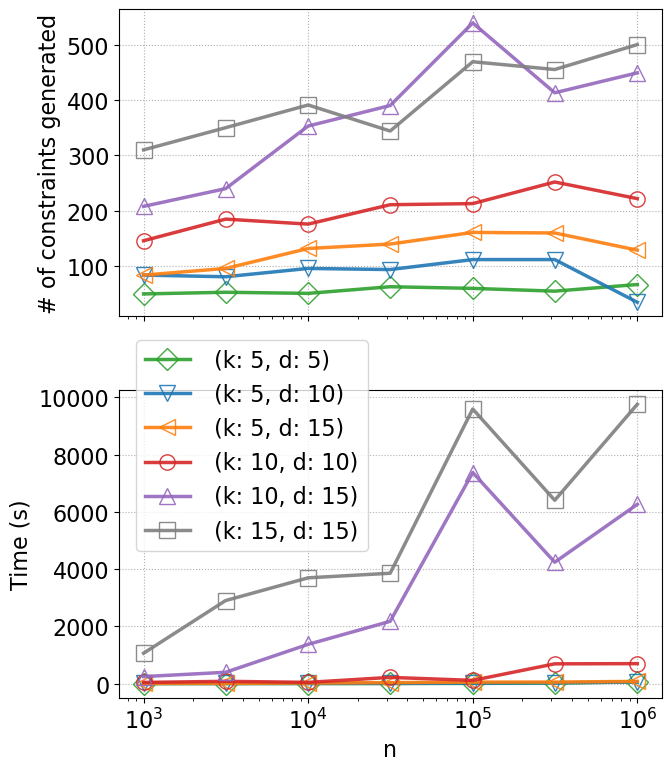

In [36]:

fig, ax = plt.subplots(2, 1, figsize = (7,8), sharey = False, sharex=True)


for i, D in enumerate(tqdm(D_list)):
    
    K = K_list[i]
    
    _,df_time,df_constr = extractData2(K,D,N_list )

    df_constr.plot(x = 'N', y = 'k-MM', marker = markers[i], fillstyle = 'none', color=col[i], ax = ax[0], markersize = 11, alpha = 0.9, linewidth = 2.5,legend = False)
    df_time.plot(x = 'N', y = 'k-MM', marker = markers[i], fillstyle = 'none', color=col[i], ax = ax[1], markersize = 11, alpha = 0.9, linewidth = 2.5,legend = False)


ax[0].set_ylabel('# of constraints generated')
ax[1].set_ylabel('Time (s)')

ax[0].set_xlabel('n')
ax[1].set_xlabel('n')


ax[0].grid(True,linestyle = ':')
ax[1].grid(True,linestyle = ':')

ax[0].set_xscale("log")
ax[1].set_xscale("log")
fig.legend([' (k: 5, d: 5)',' (k: 5, d: 10)',' (k: 5, d: 15)',' (k: 10, d: 10)',' (k: 10, d: 15)',' (k: 15, d: 15)'],loc = 'upper center',ncol=1,fontsize = 16,bbox_to_anchor=[0.38, 0.57])


fig.tight_layout(h_pad = 3)


plt.savefig(f'{RESULT_DIR}/Synthetic1.pdf', bbox_inches = 'tight')
plt.show()

## Generating data for supplementary for N = 10000

In [3]:
N = 10000

K_list = [2,2,2,5,10,10,15,15,15]
D_list = [5,10,15,2,2,5,2,5,10] 

box = 500
seed = 60

tol_list = [0.08,0.15,0.3,0.15,0.3,0.5,0.5,1,2]
initCons_list = [4,4,4,5,7,7,13,13,13]


optgap_list=[]

time_list = []
metrics_list = []

obj_list = []
constrsCnt_list = []

for i, D in enumerate(tqdm(D_list)):
    K = K_list[i]

    
    print('\n\n\nStarting N = %i K = %i and D = %i' %(N,K,D))

    df_data, X,y = Blobs(N,D,K,box, seed)

    clus = UnsupervisedClustering(K =K , max_iter= 100, random_state=0)
    clus.set_model(MinMax(initConstrCnt=initCons_list[i], optimalGap= 0.05, tol = tol_list[i], time = 60))

    start = default_timer()
    clus.fit(df_data )

    end = default_timer()
    metrics_list.append(clus.evaluate(y))
    time_list.append(end-start)

    constrsCnt_list.append(len(clus.constr_gen_pts))
    optgap_list.append(clus.model_optGap)
    obj_list.append(clus)


    print('Finished running N = %i K = %i and D = %i' %(N,K,D))
    print('*'*100)




with open(os.path.join(RESULT_DIR, 'Supp_Syn1_MM.pkl'), 'wb') as outp:

    pickle.dump(metrics_list, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(time_list, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(constrsCnt_list, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(optgap_list, outp, pickle.HIGHEST_PROTOCOL)




  0%|          | 0/9 [00:00<?, ?it/s]




Starting N = 10000 K = 2 and D = 5
MinMax model 0
# of outliers:  0
Set parameter Username
Academic license - for non-commercial use only - expires 2022-11-07
Set parameter TimeLimit to value 3600
Set parameter MIPGap to value 0.05
E:  10.990497516977456
Optimal solution reached with Cost:  10.990497516977456


 11%|█         | 1/9 [00:00<00:05,  1.58it/s]



# of constraints added:  12
Finished running N = 10000 K = 2 and D = 5
****************************************************************************************************



Starting N = 10000 K = 2 and D = 10
MinMax model 0
# of outliers:  0
Set parameter TimeLimit to value 3600
Set parameter MIPGap to value 0.05
E:  12.995305925752206
E:  13.773043428057122
E:  14.641516207646887
E:  14.647063022173342
E:  14.873416466256288
E:  14.927737450354073
E:  14.935172687435681
E:  14.935172687435596
Optimal solution reached with Cost:  14.935172687435596


 22%|██▏       | 2/9 [00:01<00:05,  1.34it/s]



# of constraints added:  25
Finished running N = 10000 K = 2 and D = 10
****************************************************************************************************



Starting N = 10000 K = 2 and D = 15
MinMax model 0
# of outliers:  0
Set parameter TimeLimit to value 3600
Set parameter MIPGap to value 0.05
E:  18.00940342288274
E:  18.389856764717024
E:  18.607821552860855
E:  19.062779930894294
E:  19.356331098484986
E:  19.356331098485157
E:  19.356331098484986
E:  19.382842466838667
E:  19.521904306963677
E:  19.548449873288153
E:  19.585025185951565
E:  19.687600875139708
E:  19.68760087513965
E:  19.687600875139537
E:  19.71085473390343
E:  19.719629742244678
E:  19.720290247637934
E:  19.720290247637593
E:  19.720290247637763
Optimal solution reached with Cost:  19.720290247637763


 33%|███▎      | 3/9 [00:03<00:08,  1.41s/it]



# of constraints added:  46
Finished running N = 10000 K = 2 and D = 15
****************************************************************************************************



Starting N = 10000 K = 5 and D = 2
MinMax model 0
# of outliers:  0
Set parameter TimeLimit to value 3600
Set parameter MIPGap to value 0.05
E:  5.744371953954484
E:  5.744371953954481
E:  5.744371953954477
Optimal solution reached with Cost:  5.744371953954477


 44%|████▍     | 4/9 [00:04<00:06,  1.29s/it]



# of constraints added:  39
Finished running N = 10000 K = 5 and D = 2
****************************************************************************************************



Starting N = 10000 K = 10 and D = 2
MinMax model 0
# of outliers:  0
Set parameter TimeLimit to value 3600
Set parameter MIPGap to value 0.05
E:  5.744371953954513
Optimal solution reached with Cost:  5.744371953954513


 56%|█████▌    | 5/9 [00:06<00:05,  1.42s/it]



# of constraints added:  100
Finished running N = 10000 K = 10 and D = 2
****************************************************************************************************



Starting N = 10000 K = 10 and D = 5
MinMax model 0
# of outliers:  0
Set parameter TimeLimit to value 3600
Set parameter MIPGap to value 0.05
E:  9.30296403822075
E:  9.302964038220694
E:  9.302964038220694
E:  9.302964038220694
E:  9.30296403822075
E:  9.302964038220694
Optimal solution reached with Cost:  9.302964038220694


 67%|██████▋   | 6/9 [00:30<00:26,  8.99s/it]



# of constraints added:  125
Finished running N = 10000 K = 10 and D = 5
****************************************************************************************************



Starting N = 10000 K = 15 and D = 2
MinMax model 0
# of outliers:  0
Set parameter TimeLimit to value 3600
Set parameter MIPGap to value 0.05
E:  5.744371953954442
E:  5.744371953954484
Optimal solution reached with Cost:  5.744371953954484


 78%|███████▊  | 7/9 [00:41<00:19,  9.87s/it]



# of constraints added:  286
Finished running N = 10000 K = 15 and D = 2
****************************************************************************************************



Starting N = 10000 K = 15 and D = 5
MinMax model 0
# of outliers:  0
Set parameter TimeLimit to value 3600
Set parameter MIPGap to value 0.05
E:  9.132848307806285
E:  9.132848307806285
Optimal solution reached with Cost:  9.132848307806285


 89%|████████▉ | 8/9 [01:37<00:24, 24.60s/it]



# of constraints added:  297
Finished running N = 10000 K = 15 and D = 5
****************************************************************************************************



Starting N = 10000 K = 15 and D = 10
MinMax model 0
# of outliers:  0
Set parameter TimeLimit to value 3600
Set parameter MIPGap to value 0.05
E:  14.294435160887762
E:  14.294435160224202
Optimal solution reached with Cost:  14.294435160224202


100%|██████████| 9/9 [07:45<00:00, 51.74s/it] 



# of constraints added:  300
Finished running N = 10000 K = 15 and D = 10
****************************************************************************************************


In [2]:
# function to extract data for N = 10000 from the two sets of saved results  

def extractData3(K_list,D_list):

    df = pd.DataFrame(np.zeros((15,5)), columns=['k','d','ARI','time','constrs'])


    i = 0
    cnt_list = 0

    with open(os.path.join(RESULT_DIR, 'Supp_Syn1_MM.pkl'), 'rb') as inp:

        metrics_list = pickle.load(inp)
        time_list = pickle.load(inp)
        constrsCnt_list = pickle.load(inp)
        optgap_list = pickle.load(inp)

    for K in [2, 5, 10 ,15]:

        for D in [ 2 , 5 , 10, 15]:

            if K != 2 or D != 2:
                print(K,D)
                df.iloc[i,0] = K
                df.iloc[i,1] = D
                if K == K_list[cnt_list] and D == D_list[cnt_list]:

                    df.iloc[i,2] = np.array(metrics_list)[cnt_list,2]
                    df.iloc[i,3] = np.array(time_list)[cnt_list]
                    df.iloc[i,4] = np.array(constrsCnt_list)[cnt_list]
                    if cnt_list != len(K_list)-1:
                        cnt_list+=1
                    i+=1
                
                else:

                    with open(os.path.join(RESULT_DIR, 'Syn1_'+str(K)+str(D)+'_' + str('MM')+'.pkl'), 'rb') as inp:

                        metrics_list_2 = pickle.load(inp)
                        time_list_2 = pickle.load(inp)
                        constrsCnt_list_2 = pickle.load(inp)
                        optgap_list_2 = pickle.load(inp)

                    df.iloc[i,2] = np.array(metrics_list_2)[2,2]
                    df.iloc[i,3] = time_list_2[2]
                    df.iloc[i,4] = constrsCnt_list_2[2]
                    i+=1

    return df


In [3]:

K_list = [2,2,2,5,10,10,15,15,15]
D_list = [5,10,15,2,2,5,2,5,10] 
df = extractData3(K_list,D_list)
df = df.drop(axis=1, columns='ARI')

2 5
2 10
2 15
5 2
5 5
5 10
5 15
10 2
10 5
10 10
10 15
15 2
15 5
15 10
15 15


In [4]:
# df = pd.concat([df,df_time], ignore_index=True)
df

,k,d,time,constrs
0,2.0,5.0,0.617079,12.0
1,2.0,10.0,0.811183,25.0
2,2.0,15.0,2.180875,46.0
3,5.0,2.0,1.084025,39.0
4,5.0,5.0,1.709657,51.0
5,5.0,10.0,6.683714,96.0
6,5.0,15.0,19.279561,132.0
7,10.0,2.0,1.628007,100.0
8,10.0,5.0,23.682622,125.0
9,10.0,10.0,43.110426,176.0


In [5]:
col = [
    'tab:green',
    'tab:blue',
'tab:orange',
'tab:red',
'tab:purple',
# 'tab:brown',
# 'tab:pink',
'tab:gray',
'tab:olive',
'tab:cyan']


markers = ["D", "v", "<", "o",  "^", "s"]
plt.rcParams.update({'font.size': 16})


In [6]:
k = [2,2,2,5,5,5,5,10,10,10,10,15,15,15,15]
d = [ 5, 10, 15,2, 5, 10, 15,2, 5, 10, 15,2, 5, 10, 15]
constrsCnt_list = list(df['constrs'])
time_list = list(df['time'])




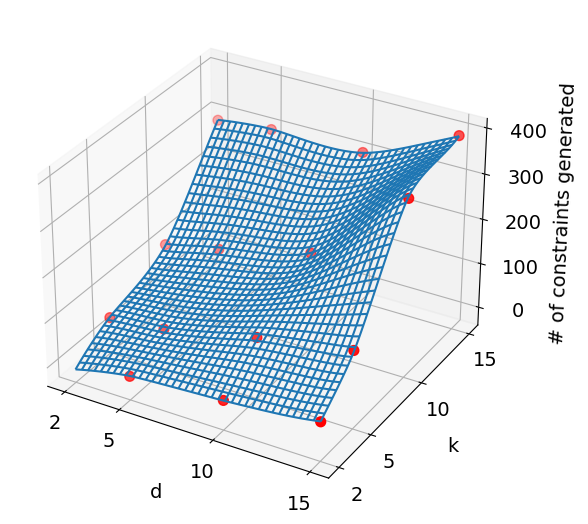

In [93]:
plt.rcParams.update({'font.size': 14})

from mpl_toolkits.mplot3d import axes3d
x_grid = np.linspace(2, 15, 5*len(d))
y_grid = np.linspace(2, 15, 5*len(k))
B1, B2 = np.meshgrid(x_grid, y_grid, indexing='xy')
# Z = np.zeros((D_list.size, K_list.size))


import scipy as sp
import scipy.interpolate
spline = sp.interpolate.Rbf(np.array(d).reshape(15,1),np.array(k).reshape(15,1), np.array(constrsCnt_list).reshape((15,1)),function='thin_plate',smooth=1, episilon=1)

Z = spline(B1,B2)
fig = plt.figure(figsize=(5,5))
ax = axes3d.Axes3D(fig)
ax.plot_wireframe(B1, B2, Z)
ax.plot_surface(B1, B2, Z,alpha=0.005)
ax.scatter3D(d,k, constrsCnt_list, c='r', s = 50)

ax.set_xlabel("d",labelpad=10)
ax.set_ylabel("k",labelpad=10)
ax.set_xticks([2,5,10,15])
ax.set_yticks([2,5,10,15])
ax.set_zticks([0,100,200,300,400])
ax.tick_params(axis='z', which='major', pad=10)


# fig.tight_layout()
# ax.set_title("n = 10,000")

ax.set_zlabel("# of constraints generated",labelpad=15)
plt.savefig(f'{RESULT_DIR}/Supp3dplot1.pdf', bbox_inches = 'tight')
plt.show()

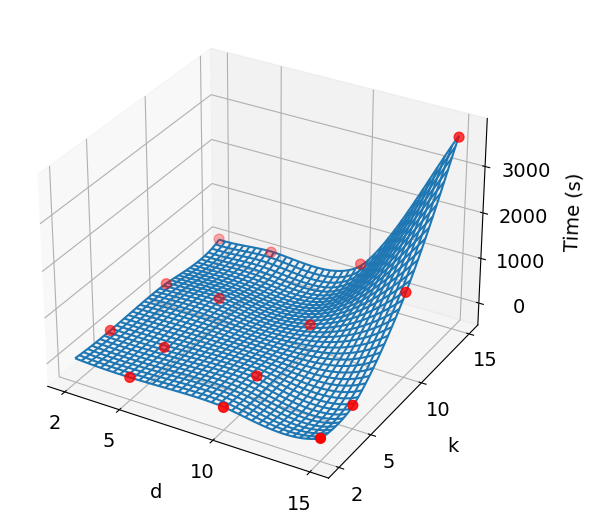

In [92]:
plt.rcParams.update({'font.size': 14})

from mpl_toolkits.mplot3d import axes3d
x_grid = np.linspace(2, 15, 5*len(d))
y_grid = np.linspace(2, 15, 5*len(k))
B1, B2 = np.meshgrid(x_grid, y_grid, indexing='xy')
# Z = np.zeros((D_list.size, K_list.size))


import scipy as sp
import scipy.interpolate
spline = sp.interpolate.Rbf(np.array(d).reshape(15,1),np.array(k).reshape(15,1), np.array(time_list).reshape((15,1)),function='thin_plate',smooth=1, episilon=1)

Z = spline(B1,B2)
fig = plt.figure(figsize=(5,5))
ax = axes3d.Axes3D(fig)
ax.plot_wireframe(B1, B2, Z)
ax.plot_surface(B1, B2, Z,alpha=0.005)
ax.scatter3D(d,k, time_list, c='r', s = 50)

ax.set_xlabel("d",labelpad=10)
ax.set_ylabel("k",labelpad=10)
ax.set_xticks([2,5,10,15])
ax.set_yticks([2,5,10,15])
ax.set_zticks([0,1000,2000,3000,4000])
# ax.
ax.tick_params(axis='z', which='major', pad=10)
# fig.tight_layout()
# ax.set_title("n = 10,000")

ax.set_zlabel("Time (s)",labelpad=20)
plt.savefig(f'{RESULT_DIR}/Supp3dplot2.pdf', bbox_inches = 'tight')
plt.show()
# ax.set_title("# of constraints added")